# Big Homework 2
---
#### Anton Buguev B19-RO-01
#### a.buguev@innopolis.university

## Initialize values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

m = 0.06385
g = 9.8
ro = 0.022530346
r = 0.35

J = m * ro ** 2
a = m * g / (m + J / r ** 2)

data = pd.read_csv('bighw2_data.csv')

## Train machine learning model

C:\Users\bugue\AppData\Local\Temp/ipykernel_12008/969928567.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pipeline.fit(x_train[:,np.newaxis], y_train)


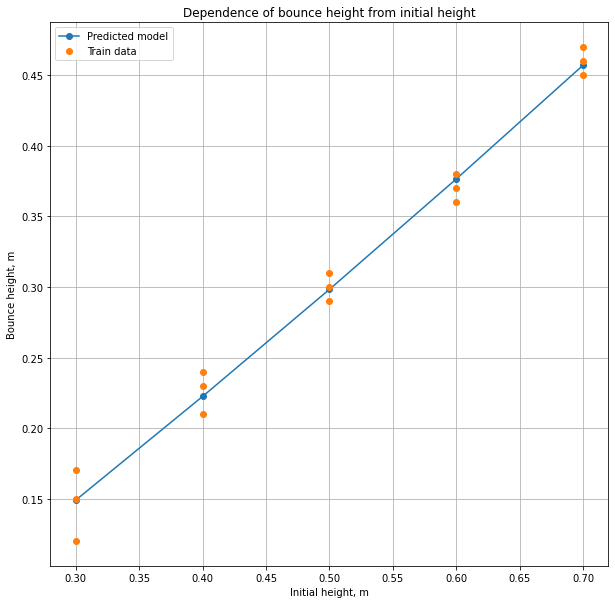

In [2]:
x_train = data['init_h']
y_train = data['fin_h']
x_test = np.array([0.3, 0.4, 0.5, 0.6, 0.7])

polynomial_features = PolynomialFeatures(degree=2)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(x_train[:,np.newaxis], y_train)

y_pred = pipeline.predict(x_test[:,np.newaxis])

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(x_test, y_pred, '-o', label="Predicted model")
ax.plot(x_train, y_train, 'o', label="Train data")
ax.legend(loc="best")
ax.set_title("Dependence of bounce height from initial height")
ax.set_xlabel("Initial height, m")
ax.set_ylabel("Bounce height, m")
ax.grid()

## Calculate number of oscillations

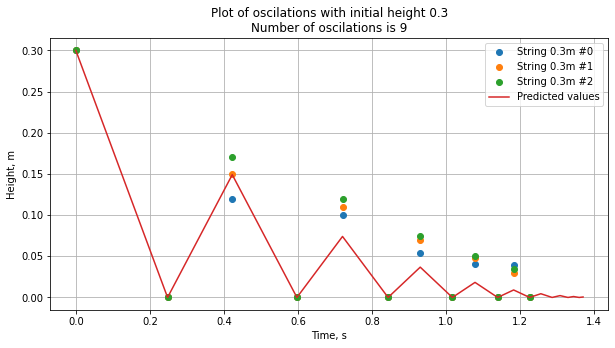

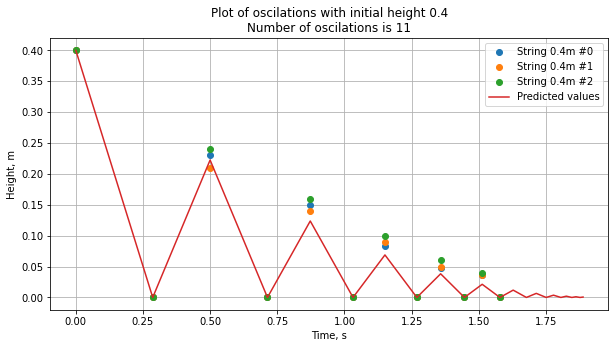

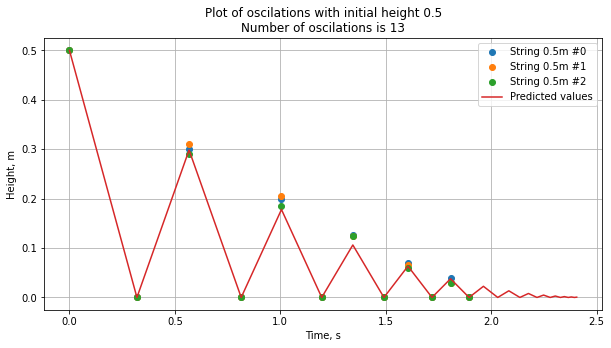

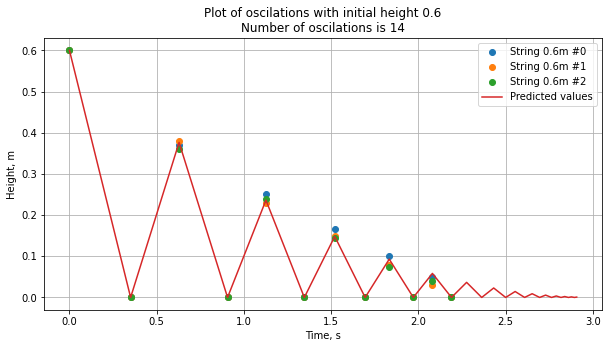

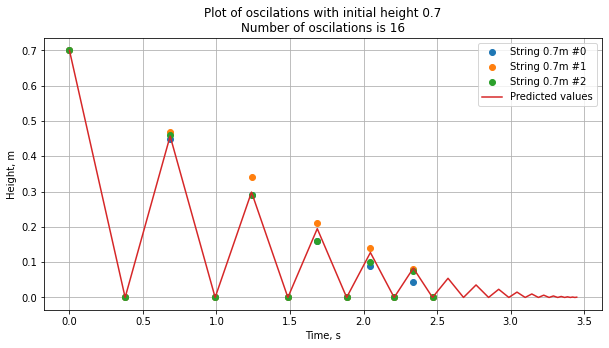

In [3]:
# Experimental values
len30_y_1 = [0.3, 0, 0.12, 0, 0.1, 0, 0.054, 0, 0.041, 0, 0.04, 0];
len30_y_2 = [0.3, 0, 0.15, 0, 0.11, 0, 0.07, 0, 0.048, 0, 0.03, 0];
len30_y_3 = [0.3, 0, 0.17, 0, 0.12, 0, 0.075, 0, 0.05, 0, 0.035, 0];

len40_y_1 = [0.4, 0, 0.23, 0, 0.15, 0, 0.083, 0, 0.048, 0, 0.037, 0];
len40_y_2 = [0.4, 0, 0.21, 0, 0.14, 0, 0.09, 0, 0.05, 0, 0.036, 0];
len40_y_3 = [0.4, 0, 0.24, 0, 0.16, 0, 0.1, 0, 0.06, 0, 0.039, 0];

len50_y_1 = [0.5, 0, 0.3, 0, 0.2, 0, 0.126, 0, 0.07, 0, 0.04, 0];
len50_y_2 = [0.5, 0, 0.31, 0, 0.205, 0, 0.125, 0, 0.065, 0, 0.03, 0];
len50_y_3 = [0.5, 0, 0.29, 0, 0.185, 0, 0.124, 0, 0.06, 0, 0.03, 0];

len60_y_1 = [0.6, 0, 0.37, 0, 0.25, 0, 0.165, 0, 0.1, 0, 0.05, 0];
len60_y_2 = [0.6, 0, 0.38, 0, 0.23, 0, 0.15, 0, 0.08, 0, 0.03, 0];
len60_y_3 = [0.6, 0, 0.36, 0, 0.24, 0, 0.145, 0, 0.075, 0, 0.04, 0];

len70_y_1 = [0.7, 0, 0.45, 0, 0.29, 0, 0.16, 0, 0.09, 0, 0.045, 0];
len70_y_2 = [0.7, 0, 0.47, 0, 0.34, 0, 0.21, 0, 0.14, 0, 0.08, 0];
len70_y_3 = [0.7, 0, 0.46, 0, 0.29, 0, 0.16, 0, 0.1, 0, 0.075, 0];

strings = [[len30_y_1, len30_y_2, len30_y_3], [len40_y_1, len40_y_2, len40_y_3], 
           [len50_y_1, len50_y_2, len50_y_3], [len60_y_1, len60_y_2, len60_y_3],
           [len70_y_1, len70_y_2, len70_y_3]]

# For each predicted height calculate number of oscillations
for i in range(len(y_pred)):
  fig, ax = plt.subplots(1, 1, figsize=(10, 5))
  ax.set_xlabel("Time, s")
  ax.set_ylabel("Height, m")

  # Initial velocity before bounce
  v_p = np.sqrt(2 * a * x_test[i])
  # Velocity after bounce
  v_n = np.sqrt(2 * a * y_pred[i])
  # Coefficient
  k = v_n / v_p

  n = 1 # Number of oscillations
  # Time of falling and going up after first bounce
  t = [0, np.sqrt(2 * x_test[i] / a), np.sqrt(2 * x_test[i] / a) + np.sqrt(2 * y_pred[i] / a)]
  # Initial heght, 0 and height after first bounce
  y = [x_test[i], 0, y_pred[i]]
  j = 2
  while y[j] > 0.001:
    v1 = np.sqrt(2 * a * y[j]) # Velovity before bounce
    t.append(t[j] + np.sqrt(2 * y[j] / a)) # increase time
    y.append(0)
    v2 = k * v1 # Velocity after bounce
    y.append(v2 ** 2 / (2 * a)) # Height
    t.append(t[j + 1] + np.sqrt(2 * y[j + 2] / a)) # Increase time
    j += 2
    n += 1
  
  # Plot results
  for k in range(3):
    ax.plot(t[:12], strings[i][k], 'o', label=f"String {strings[i][k][0]}m #{k}")
  
  ax.plot(t, y, label="Predicted values")
  ax.set_title(f"Plot of oscilations with initial height {x_test[i]}\nNumber of oscilations is {n}")
  ax.legend(loc="best")
  ax.grid()